In [2]:
import pandas as pd

당면한 문제 : 훈련 데이터가 한 번에 준비되는 것이 아니라, 조금씩 전달된다는 것이다. <br>
- 기존의 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시 훈련하면 어떨까 ? 

단점은 시간이 지날 수록 데이터의 크기가 늘어나는 것 <br>
처음 몇 번은 괜찮지만, 데이터셋의 크기가 너무 커질 수가 있다. 

또다른 방법은 새로운 데이터를 추가할 때 이전 데이터를 버림으로써 훈련 데이터 크기를 일정하게 유지 <br>
그러나 버리는 데이터에 다른 데이터에는 없는 중요한 데이터가 있을 수도 있다. 

앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련할 수는 없을까 ? <br>
이렇게 할 수 있다면 훈련에 사용한 데이터를 모두 유지할 필요도 없고, 앞서 학습한 생선을 까먹을 일도 없을 것이다. 

이러한 훈련 방식을 **점진적 학습**이라고 한다. <br>
대표적인 예시로 **확률적 경사 하강법**이 있다. 

사이킷런에서도 확률적 경사 하강법을 위한 클래스를 제공한다. <br>
사용하기 전에 어떤 알고리즘인지, 또 왜 중요한 지에 대해 알아보자. 

### 확률적 경사 하강법 

경사를 따라 내려가는 방법 <br>
가장 가파른 경사를 따라 원하는 지점에 도달하는 것이 목표

그러나 한 번에 걸음이 너무 크면 경사를 따라 내려가지 못하고 오히려 올라갈 수 있다. 

가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 목표이다. <br>
= 경사 하강법 모델을 훈련하는 것 

**확률적** 의 의미 : 
- 모델을 훈련할 때 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는다. 
- 이처럼 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것이 바로 확률적 경사 하강법이다. 

이런 식으로 전체 샘플을 모두 사용할 때까지 반복 <br>
그래도 산을 다 내려오지 못하면 ? 다시 처음부터 시작 - 훈련 세트에 모든 샘플을 다시 집어넣는다. 

만족할 만한 위치에도달할 때까지 계속 내려가면 된다. <br>
훈련 세트를 한 번 모두 사용하는 과정을 **에포크**라고 하는데( 반복의 횟수 )

일반적으로 경사 하강법은 수십, 수백 번 수행한다. 

무작위로 하나가 아니라 몇 개의 샘플을 골라서 사용하는 것을 **미니 배치 경사 하강법**이라 한다. 

극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용할 수도 있다. 이를 **배치 경사법**이라 한다. 

사실 전체 데이터를 사용하기 때문에 가장 안정적이지만, 그만큼 컴퓨터 자원을 많이 사용하게 된다. 

### 손실 함수

어떤 문제에서 머신 러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준 <br>
손실 함수의 값이 작으면 작을 수록 좋다. 

하지만 어떤 값이 최솟값인지는 알 수 없다. 가능한 많이 찾아보고 만족할 만한 수준이라면 산을 다 내려왔다고 인정해야 한다. 

이 값을 찾아서 조금씩 이동하려면 확률적 경사 하강법이 잘 맞을 것이다. 

다행히 우리가 다루는 많은 문제에 필요한 손실 함수는 이미 정의되어 있다. 그럼 생선을 분류하기 위해서는 어떤 손실 함수를 사용하는지 알아 보자. 

분류 함수에서의 손실은 정답을 못 맞히는 것이다. <br>
이진 분류에서 도미는 양성 클래스, 빙어는 음성 클래스라고 가정했을 때, 

4개의 샘플 예측 값 중 2개를 맞히면 정확도는 0.5이다. <br>
정확도를 손실 함수로 사용할 수도 있지 않을까 ? 

예를 들어 정확도에 음수를 취하면 -1.0이 가장 낮고, -0.0이 가장 높다. 손실 함수로 괜찮을 것 같다. 

하지만 정확도에는 치명적인 단점이 있다. 앞의 사례와 같이 4개의 샘플만 있다면 가능한 정확도는 0, 0.25, 0.5, 0.75, 1의 5개만 가능하다. <br>
앞에서 경사하강법을 사용할때 조금씩 내려올 수 없다. 산의 경사면은 확실히 연속적이여야 한다. 

그럼 어떻게 연속적인 손실 함수를 만들 수 있을까 ? 

로지스틱 회귀 모델이 확률을 출력했었다. 예측은 0 또는 1이지만 확률은 0 ~ 1 사이에 어떤 값도 될 수 있다. 즉 연속적이다. <br>

가령 위의 샘플 4개의 예측 확률을 각각 0.9, 0.3, 0.2, 0.8이라고 가정하자. 첫 번째 샘플부터 어떻게 손실 함수를 만들 수 있는지 보자. 

그러면, 도미의 예측값은 0인데, 이를 확률과 곱하면 무조건 0이 될 것이다. <br>
한 가지 방법은 타깃을 마치 양성 클래스처럼 바꾸어 1로 만드는 것이다. 그러면 반대로 도미를 맞출 확률은 ( 1 - 0.2 ) = 0.8 이 된다. 

그 다음 곱하고 음수로 바꾸는 것은 위와 동일하다. 


```
0.9 * 1 -> -0.9
0.3 * 1 -> -0.3
0.2 * 0 -> 0.8 * 1 -> -0.8
0.8 * 0 -> 0.2 * 1 -> -0.2
```

네 번째 샘플의 손실이 높다. 예측 확률을 사용해 이런 방식으로 계산하면 연속적인 손실 함수를 얻을 수 있을 것 같다. 

여기에서 예측 확률에 로그 함수를 적용하면 더 좋겠다. <br>
예측 확률의 범위는 0 ~ 1 사이인데 로그 함수는 이 사이에서 음수가 되므로 최종 손실 값은 양수가 된다. 

손실이 양수가 되면 더 이해하기 쉽다. 로그 함수는 0에 가까울 수록 아주 큰 음수가 되기 때문에 손실을 아주 크게 만들어 모델에 큰 영향을 미칠 수 있다. 

양성 클래스(타깃 = 1)일 때 손실은 $-log(예측 확률)$ 로 계산한다.

확률이 1에서 멀어질 수록 손실은 아주 큰 양수가 된다.<br>

이 손실 함수를 **로지스틱 손실 함수**라 부른다. 또는 **이진 크로스엔트로피 손실 함수**라 부른다. 

다중 분류에서 사용하는 손실 함수를 **크로스엔트로피 손실 함수**라고 부른다. <br>
회귀에서는 **평균 제곱 오차( mean squared error )**를 많이 사용한다. <br>
이 값이 작을 수록 좋은 모델이다. 

## SGDClassifier
이번에도 fish_csv_data 파일에서 판다스 데이터프레임 모델을 만들어 보자. 
- https://bit.ly/fish_csv_data

In [3]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

그 다음 Species 열을 제외한 나머지 5개는 입력 데이터로 사용한다. Species 열은 타깃 데이터이다.

In [4]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [5]:
fish_target = fish[['Species']].to_numpy()
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

훈련 세트와 테스트 세트의 특성을 표준화 전처리한다. 꼭 훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환해야 한다. 

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
)

표준화 전처리

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

사이킷런의 확률적 경사 하강법을 제공하는 대표적 분류용 클래스는 **SGDClassifier**이다. <br>
``` from sklearn.linear_model import SGDClassifier ```

In [9]:
from sklearn.linear_model import SGDClassifier

SGDClassifier 객체를 만들 때 2개의 매개변수를 제공한다. 
- loss는 손실 함수를 지정한다. 여기에서는 log를 지정하여 로지스틱 손실 함수를 지정
- max_iter : 수행할 에포크 횟수를지정 , 10으로 지정하여 전체 훈련 세트를 10회 반복 


그 다음 훈련세트와 테스트 세트에서 정확도 점수를 출력 

In [12]:
sc = SGDClassifier(loss = 'log', max_iter=10, random_state = 42)

다중 분류일 경우 SGDClassifier에 loss = log라고 지정하면 클래스마다 이진 분류 모델을 만든다. <br>
즉 도미를 양성 클래스로 만들고, 나머지를 모두 음성 클래스로 지정 <br>
이것을 OvR(One Versus Rest) 라고 부른다.

In [13]:
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


c:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
c:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


출력된 훈련 세트와 테스트 세트 모두 정확도가 낮다. 아마도 지정한 횟수 10이 부족한 것 같다. 

확률적 경사 하강법은 점진적 학습이 가능하다. SGDClassifier 객체를 다시 만들지 않고 <br>
훈련한 모델 sc를 추가로 더 훈련해 보자. 모델을 이어서 훈련할 때는 <br>
```SGDClassifier.partial_fit()``` 함수를 사용한다.

이 메서드는 fit()함수와 사용법이 같지만 호출할 때마다 1 에포크씩 이어서 훈련할 수 있다. 

In [14]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


c:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
c:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


아직 점수가 낮지만 에포크를 한 번 더 실행하니 정확도가 향상되었다. <br>
이 모델을 여러 에포크에서 더 훈련해 볼 필요가 있다. <br>
무작정 많이 반복할 수는 없고 어떤 기준이 필요하다. 

train_scaled와 train_targetr을 한꺼번에 모두 사용했으니 확률적 경사 하강법이 아닌, 배치 경사 하강법이 아닐까 ? 

아니다. SGDClassifier 객체에 한 번에 훈련 세트를 전달했지만 이 알고리즘은 전달한 훈련 세트에서 1개씩 샘플을 꺼내어 경사 하강법 단계를 수행한다. <br>
아쉽지만 SGDClassifier는 미니배치 경사 하강법이나 배치 하강법을 제공하지 않는다. 하지만 7장에서 배울 신경망에서 미니 배치 경사 하강법을 사용해 보겠다. 

## 에포크와 과대/과소 적합

에포크 횟수가 적으면 훈련 세트를 덜 학습하여 과소 적합이 발생 <br>
에포크 횟수가 많으면 훈련 세트를 완전히 학습하여 과대적합된 모델 발생 

과대적합이 시작되기 전에 미리 종료하는 것을 **조기 종료**라 한다. 

우리는 fit() 메서드를 사용하지 않고, partial_fit() 메서드만 사용할 예정 <br>
partial_fit()메서드만 사용하면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해 주어야 한다. 

이를 위해 np.unique() 함수로 train_target에 있는 7개 생선의 목록을 준비해 준다. <br>


In [22]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)
classes = np.unique(train_target)

또한 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트를 준비한다. 

In [23]:
train_score = []
test_score = []

300번의 에포크 동안 훈련을 반복하여 진행해 보자. <br>
반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 train_score, test_score 리스트에 추가해 보자.

In [24]:
for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

c:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
c:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
c:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 그려 보자.

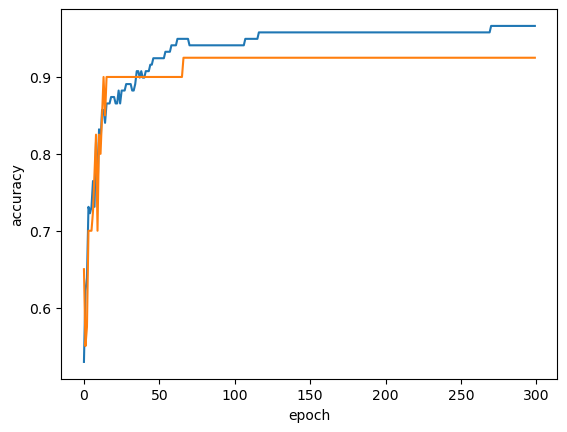

In [25]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

데이터가 작기 때문에 아주 잘 드러나지는 않지만, 100번째 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있다. <br>
또 확실히 에포크 초기에는 과소적합이 들어난다. 100번째가 적합해 보인다. 

그럼 SGDClassifier의 반복 횟수를 100으로 맞추고 모델을 다시 훈련시켜 보겠다. 그리고 최종적으로 <br>
훈련 세트와 테스트 세트에서 점수를 출력한다. 

In [29]:
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)

c:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
c:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [30]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


tol = None : 조기 종료 없이 무조건 끝까지 훈련하도록 설정 

### SGDClassifer의 loss 매개변수

사실 loss 함수의 기본값은 **hinge** 이다. hinge loss는 서포트 벡터 머신이라는 또다른 머신 러닝 알고리즘을 위한 손실 함수이다. <br>
여기에서는 힌지 손실과 서포트 벡터 머신에 대해서는 다루지 않는다.  

간단한 예로 힌지 손실을 사용해 같은 반복 횟수 동안 모델을 훈련해 보겠다. 

In [31]:
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


c:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
